In [120]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [121]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [122]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [123]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [124]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [125]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [126]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [127]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [30]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [32]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
last_year = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()

In [71]:
# Save the query results as a Pandas DataFrame and set the index to the date column
yearDF = pd.DataFrame(last_year, columns = ['Date', 'Prcp'])

# Sort the dataframe by date
yearDF.sort_values(by='Date', ascending=False)
yearDF.set_index('Date', inplace=True)


,Prcp
Date,
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10


([<matplotlib.axis.XTick at 0x1925c589b20>], [Text(-500.0, 0, '2017-05-27')])

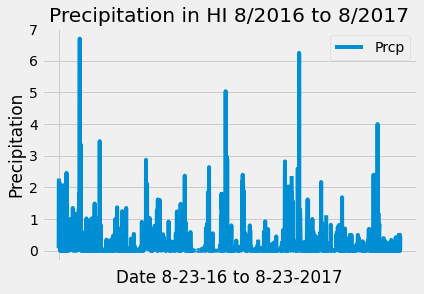

In [76]:
fig = yearDF.plot().get_figure()
plt.xlabel("Date 8-23-16 to 8-23-2017")
plt.ylabel("Precipitation")
plt.title("Precipitation in HI 8/2016 to 8/2017")
plt.xticks([.5],rotation=90)

In [93]:
yearDF.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [90]:
# Design a query to calculate the total number stations in the dataset
locations = session.query(station)
print("There are {} stations.".format(locations.count()))

There are 9 stations.


In [92]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations_descending = session.query(measurement.station, func.count(measurement.station)).\
        group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

most_active_station_name = ""
most_active_station = active_stations_descending[0][0]

for location in locations:
    if(location.station == active_stations_descending[0][0]):
        most_active_station_name = location.name 
print(f"The most active stations information is as follows: ")
print(f" Name    : {most_active_station_name} ")
print(f" Station : {active_stations_descending[0][0]}")
print(f" Count   : {active_stations_descending[0][1]}")
print("")
print("List of the stations and the counts in descending order:")
print("Station        Counts")
print("-----------------------")
for active_station_descending in active_stations_descending:
    print(active_station_descending[0], "   ", active_station_descending[1])

The most active stations information is as follows: 
 Name    : WAIHEE 837.5, HI US 
 Station : USC00519281
 Count   : 2772

List of the stations and the counts in descending order:
Station        Counts
-----------------------
USC00519281     2772
USC00519397     2724
USC00513117     2709
USC00519523     2669
USC00516128     2612
USC00514830     2202
USC00511918     1979
USC00517948     1372
USC00518838     511


In [113]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_stationsummary = session.query(measurement.station, measurement.date, measurement.tobs).\
    filter(measurement.station == most_active_station).all()
most_stationsummary
# Save the query results as a Pandas DataFrame and set the index to the date column


[('USC00519281', '2010-01-01', 70.0),
 ('USC00519281', '2010-01-02', 62.0),
 ('USC00519281', '2010-01-03', 74.0),
 ('USC00519281', '2010-01-04', 75.0),
 ('USC00519281', '2010-01-05', 74.0),
 ('USC00519281', '2010-01-06', 76.0),
 ('USC00519281', '2010-01-07', 69.0),
 ('USC00519281', '2010-01-08', 66.0),
 ('USC00519281', '2010-01-09', 70.0),
 ('USC00519281', '2010-01-10', 75.0),
 ('USC00519281', '2010-01-11', 64.0),
 ('USC00519281', '2010-01-12', 60.0),
 ('USC00519281', '2010-01-13', 61.0),
 ('USC00519281', '2010-01-14', 68.0),
 ('USC00519281', '2010-01-15', 64.0),
 ('USC00519281', '2010-01-16', 66.0),
 ('USC00519281', '2010-01-17', 67.0),
 ('USC00519281', '2010-01-18', 70.0),
 ('USC00519281', '2010-01-19', 67.0),
 ('USC00519281', '2010-01-20', 67.0),
 ('USC00519281', '2010-01-21', 69.0),
 ('USC00519281', '2010-01-22', 60.0),
 ('USC00519281', '2010-01-23', 75.0),
 ('USC00519281', '2010-01-24', 75.0),
 ('USC00519281', '2010-01-25', 65.0),
 ('USC00519281', '2010-01-26', 75.0),
 ('USC005192

In [112]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temperature_frequencies = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station ==most_active_station).all()
    
print(f"The Lowest, Highest & the average temperature for most active station {most_active_station_name} is :")
print(f" Low  : {temperature_frequencies[0][0]}")
print(f" High : {temperature_frequencies[0][1]}")
print(f" Avg  : {temperature_frequencies[0][2]}")

The Lowest, Highest & the average temperature for most active station WAIHEE 837.5, HI US is :
 Low  : 54.0
 High : 85.0
 Avg  : 71.66378066378067


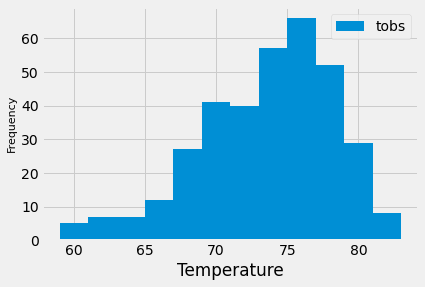

In [118]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Sort the dataframe by date
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
last_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)

temp_results = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == most_active_station).filter(measurement.date >= last_year).\
    group_by(measurement.date).all()

# Put data into dataframe so it can be plotted as histogram
temp_results_df = pd.DataFrame(data=temp_results, columns=["date", "tobs"])
temp_results_df = temp_results_df.set_index('date', drop=True)

#Plot the results as a histogram with bins=12
plt.hist(temp_results_df['tobs'],12, label="tobs")
plt.ylabel("Frequency", fontsize=11)
plt.xlabel("Temperature")
plt.legend()
plt.show()

# Close session

In [119]:
# Close Session
session.close()